# Assignment2_Exercise8: Coefficient accuracy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import defaultdict

In [2]:
data = np.loadtxt('data_build_stories.csv' ,delimiter=',')

In [3]:
X = data[:,:1]
y=data[:,1]

## Exe8.Question1: Plot error of the height and stories data

In [4]:
def normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    def normal_(x):
        return (x - means) / stds
    
    return normal_

In [5]:
func_normal=normalize(X)
normalX = func_normal(X)

In [6]:
Xe = np.c_[np.ones((normalX.shape[0],1)),normalX]

In [7]:
def gradient_descent(X, y, theta,N, rate):

    for i in range(N):
        prediction = np.dot(X, theta)  
        error = prediction - y
        cost = 1/(X.shape[0]) * np.dot(error.T, error) 
        theta = theta - (rate * np.dot(X.T, error))


    print(cost)
    return theta

In [8]:
init_theta = np.zeros(Xe.shape[1])

theta = gradient_descent(Xe, y, theta=init_theta, N=1000000, rate=0.0001)

23.301501641386537


In [9]:
y_pred = np.dot(Xe,theta)

In [10]:
XYy = np.c_[normalX,y,y_pred]

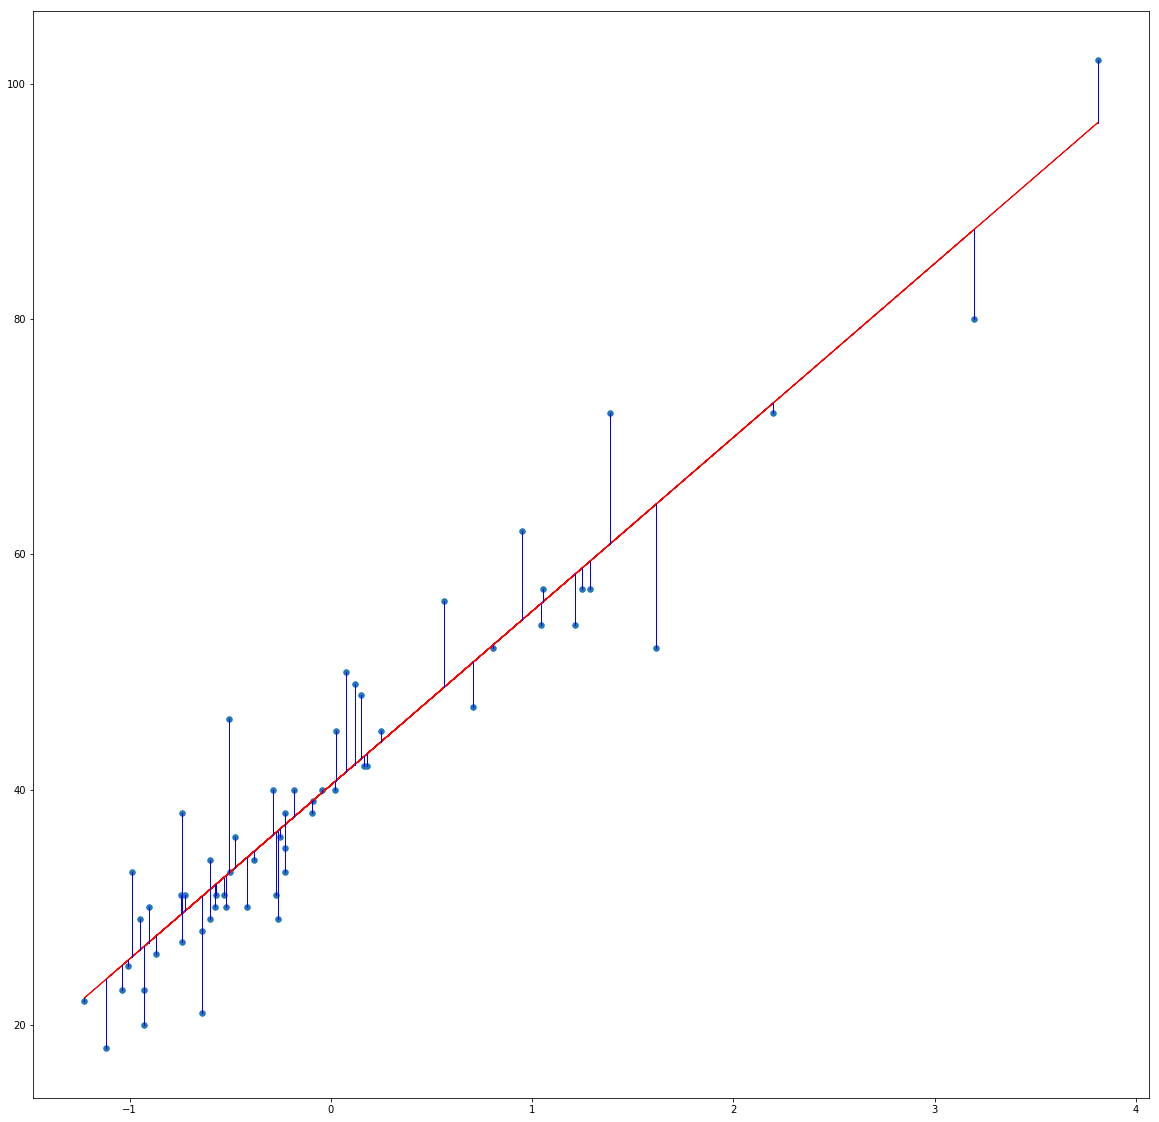

In [11]:
plt.figure(figsize=(20, 20))

plt.scatter(Xe[:,1:2], y, s=30)
plt.plot(Xe[:,1:2],y_pred, linewidth=1, color='red')
for f in XYy:
    plt.plot([f[0],f[0]],[f[1],f[2]], linewidth=1, color='blue')


plt.show()

### mean of the error vector

In [50]:
(y_pred - y).mean()

-5.858424856342026e-13

### correlation r between X and Y 

In [52]:
cor = np.corrcoef(X.reshape(1,-1)[0], y,rowvar=True)
cor

array([[1.        , 0.95055489],
       [0.95055489, 1.        ]])

Correlation 'cor' can show whether and how strongly pairs of variables are related. Since correlation is positive that means that, as one variable X gets larger the other one Y gets larger. Also, the relationship between X and Y variables is considered strong since their r value is larger than 0.7. Therefore, We can say that relation is Strong.

## Exe8.Question2. Compute Confidence Interval 

In [55]:
se =np.sqrt((((y_pred - y)**2).sum())/((y.shape[0]-2)*((X-X.mean())**2).sum()))
se

0.0034325642125901277

In [54]:
ci = [theta[1]-2*se,theta[1]+2*se]
ci

[14.7681663068769, 14.781896563727262]

We can say safely that there is probably a positive relationship between Xand Y.